In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235549 entries, 0 to 1235548
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1235549 non-null  int64  
 1   kWh       1235549 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.9 MB


In [4]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1235544    0.20
1235545    0.20
1235546    0.21
1235547    0.21
1235548    0.21
Name: kWh, Length: 1235549, dtype: float64

In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1235544    0.20
1235545    0.20
1235546    0.21
1235547    0.21
1235548    0.21
Name: kWh, Length: 1235549, dtype: float64

In [6]:
l=len(conso_data)-1
l

1235548

In [7]:
conso_data['sec']=conso_data['Interval']/1000


In [8]:
conso_data['Wh']=3600000/conso_data['Interval']


In [9]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [10]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235549 entries, 0 to 1235548
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1235549 non-null  int64  
 1   kWh        1235549 non-null  float64
 2   sec        1235549 non-null  float64
 3   Wh         1235549 non-null  float64
 4   cumul(ms)  1235549 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 47.1 MB


In [11]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1235544,17570,0.20,17.570,204.894707,29086340596
1235545,17486,0.20,17.486,205.878989,29086358082
1235546,17368,0.21,17.368,207.277752,29086375450
1235547,17245,0.21,17.245,208.756161,29086392695
1235548,17194,0.21,17.194,209.375363,29086409889


In [12]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

29086409889000

In [13]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 5, 44, 878513)

In [14]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [15]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [16]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [17]:
conso_data['dates']

0         2023-08-21 19:06:06.812513
1         2023-08-21 19:06:28.670513
2         2023-08-21 19:06:50.671513
3         2023-08-21 19:07:12.599513
4         2023-08-21 19:07:34.490513
                     ...            
1235544   2024-07-23 10:38:05.474513
1235545   2024-07-23 10:38:22.960513
1235546   2024-07-23 10:38:40.328513
1235547   2024-07-23 10:38:57.573513
1235548   2024-07-23 10:39:14.767513
Name: dates, Length: 1235549, dtype: datetime64[ns]

In [18]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:06:06.812513,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:06:28.670513,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:06:50.671513,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:07:12.599513,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:07:34.490513,21/08/23
...,...,...,...,...,...,...,...
1235544,17570,0.20,17.570,204.894707,29086340596,2024-07-23 10:38:05.474513,23/07/24
1235545,17486,0.20,17.486,205.878989,29086358082,2024-07-23 10:38:22.960513,23/07/24
1235546,17368,0.21,17.368,207.277752,29086375450,2024-07-23 10:38:40.328513,23/07/24
1235547,17245,0.21,17.245,208.756161,29086392695,2024-07-23 10:38:57.573513,23/07/24


In [19]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('23/07/24', 23, 7, 2024)

In [20]:
here = now.strftime('%H:%M:%S')
here

'10:39:44'

In [21]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [22]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 1234254 to 1235548
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1295 non-null   int64         
 1   kWh        1295 non-null   float64       
 2   sec        1295 non-null   float64       
 3   Wh         1295 non-null   float64       
 4   cumul(ms)  1295 non-null   int64         
 5   dates      1295 non-null   datetime64[ns]
 6   days       1295 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 80.9+ KB


In [23]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [24]:
data = list(df_grp['kWh'])
print(data)


[0.834, 3.7, 4.231, 3.682, 4.189, 4.609, 3.523, 3.407, 3.515, 3.696, 3.771, 3.789, 4.257, 3.808, 3.461, 3.64, 3.325, 3.374, 4.291, 4.004, 4.046, 3.923, 3.443, 4.455, 3.744, 3.76, 4.374, 4.679, 3.799, 3.224, 3.179, 4.002, 3.67, 3.168, 3.795, 4.149, 3.753, 3.571, 4.783, 4.186, 4.543, 3.775, 3.406, 4.306, 3.876, 3.865, 3.436, 4.08, 3.655, 3.399, 4.135, 3.382, 3.888, 3.837, 3.642, 3.75, 4.244, 3.304, 3.869, 2.979, 2.055, 2.042, 2.455, 4.089, 3.723, 4.331, 3.616, 3.919, 3.743, 3.924, 3.983, 4.114, 3.644, 3.159, 3.804, 3.51, 3.624, 3.709, 3.685, 3.238, 3.906, 3.217, 3.788, 3.607, 4.083, 3.607, 3.345, 3.817, 4.064, 4.374, 4.091, 3.997, 4.23, 3.749, 3.923, 3.865, 3.913, 3.743, 4.044, 4.346, 3.887, 3.503, 3.683, 3.674, 3.343, 3.847, 3.994, 4.104, 3.473, 4.176, 3.607, 4.08, 4.528, 3.685, 3.427, 3.58, 4.167, 3.692, 4.083, 3.981, 3.745, 3.591, 5.129, 3.698, 3.766, 4.294, 4.1, 4.72, 4.399, 3.98, 3.782, 4.361, 4.679, 4.2, 4.788, 4.32, 3.719, 4.183, 3.707, 3.632, 3.53, 3.948, 3.672, 3.786, 3.577, 3.4

In [25]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [26]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [27]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [28]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.30624
dtype: float64

In [29]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.65547
dtype: float64

In [30]:
last=df_grp.iloc[-1]['kWh']
last

1.295

In [31]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 1234254 to 1235548
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1295 non-null   int64         
 1   kWh        1295 non-null   float64       
 2   sec        1295 non-null   float64       
 3   Wh         1295 non-null   float64       
 4   cumul(ms)  1295 non-null   int64         
 5   dates      1295 non-null   datetime64[ns]
 6   days       1295 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 80.9+ KB


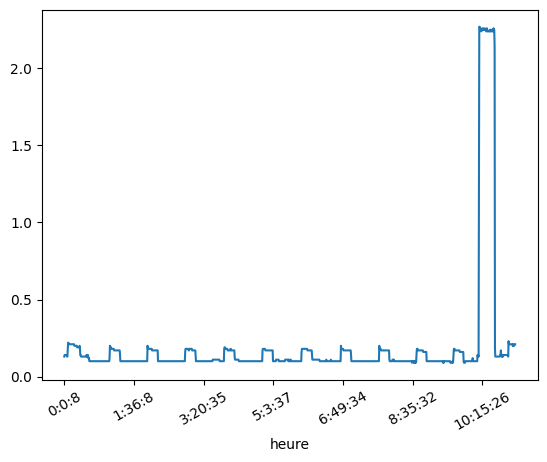

In [32]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [33]:
conso_day['heure']


1234254       0:0:8
1234255      0:0:34
1234256       0:1:0
1234257      0:1:26
1234258      0:1:52
             ...   
1235544     10:38:5
1235545    10:38:22
1235546    10:38:40
1235547    10:38:57
1235548    10:39:14
Name: heure, Length: 1295, dtype: object

In [34]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:8',
             days   kWh
  heure                
  0:0:8  23/07/24  0.13),
 ('0:0:34',
              days   kWh
  heure                 
  0:0:34  23/07/24  0.14),
 ('0:1:0',
             days   kWh
  heure                
  0:1:0  23/07/24  0.14),
 ('0:1:26',
              days   kWh
  heure                 
  0:1:26  23/07/24  0.14),
 ('0:1:52',
              days   kWh
  heure                 
  0:1:52  23/07/24  0.14),
 ('0:2:19',
              days   kWh
  heure                 
  0:2:19  23/07/24  0.14),
 ('0:2:45',
              days   kWh
  heure                 
  0:2:45  23/07/24  0.14),
 ('0:3:12',
              days   kWh
  heure                 
  0:3:12  23/07/24  0.14),
 ('0:3:39',
              days   kWh
  heure                 
  0:3:39  23/07/24  0.13),
 ('0:4:6',
             days   kWh
  heure                
  0:4:6  23/07/24  0.13),
 ('0:4:26',
              days   kWh
  heure                 
  0:4:26  23/07/24  0.18),
 ('0:4:43',
              days   

In [35]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:8',
  heure
  0:0:8    0.13
  Name: kWh, dtype: float64),
 ('0:0:34',
  heure
  0:0:34    0.14
  Name: kWh, dtype: float64),
 ('0:1:0',
  heure
  0:1:0    0.14
  Name: kWh, dtype: float64),
 ('0:1:26',
  heure
  0:1:26    0.14
  Name: kWh, dtype: float64),
 ('0:1:52',
  heure
  0:1:52    0.14
  Name: kWh, dtype: float64),
 ('0:2:19',
  heure
  0:2:19    0.14
  Name: kWh, dtype: float64),
 ('0:2:45',
  heure
  0:2:45    0.14
  Name: kWh, dtype: float64),
 ('0:3:12',
  heure
  0:3:12    0.14
  Name: kWh, dtype: float64),
 ('0:3:39',
  heure
  0:3:39    0.13
  Name: kWh, dtype: float64),
 ('0:4:6',
  heure
  0:4:6    0.13
  Name: kWh, dtype: float64),
 ('0:4:26',
  heure
  0:4:26    0.18
  Name: kWh, dtype: float64),
 ('0:4:43',
  heure
  0:4:43    0.22
  Name: kWh, dtype: float64),
 ('0:4:59',
  heure
  0:4:59    0.22
  Name: kWh, dtype: float64),
 ('0:5:16',
  heure
  0:5:16    0.21
  Name: kWh, dtype: float64),
 ('0:5:33',
  heure
  0:5:33    0.21
  Name: kWh, dtype: float64),
 

In [36]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:8,27755,0.13,27.755,129.706359,29048064066,2024-07-23 00:00:08.944513,23/07/24
0:0:34,25838,0.14,25.838,139.329669,29048089904,2024-07-23 00:00:34.782513,23/07/24
0:1:0,25626,0.14,25.626,140.482323,29048115530,2024-07-23 00:01:00.408513,23/07/24
0:1:26,25887,0.14,25.887,139.065940,29048141417,2024-07-23 00:01:26.295513,23/07/24
0:1:52,26482,0.14,26.482,135.941394,29048167899,2024-07-23 00:01:52.777513,23/07/24
...,...,...,...,...,...,...,...
10:38:5,17570,0.20,17.570,204.894707,29086340596,2024-07-23 10:38:05.474513,23/07/24
10:38:22,17486,0.20,17.486,205.878989,29086358082,2024-07-23 10:38:22.960513,23/07/24
10:38:40,17368,0.21,17.368,207.277752,29086375450,2024-07-23 10:38:40.328513,23/07/24


In [37]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [38]:
df.iloc[0].dates

Timestamp('2024-07-23 00:00:08.944513')

In [39]:
df.dates.dt.time

heure
0:0:8       00:00:08.944513
0:0:34      00:00:34.782513
0:1:0       00:01:00.408513
0:1:26      00:01:26.295513
0:1:52      00:01:52.777513
                 ...       
10:38:5     10:38:05.474513
10:38:22    10:38:22.960513
10:38:40    10:38:40.328513
10:38:57    10:38:57.573513
10:39:14    10:39:14.767513
Name: dates, Length: 1295, dtype: object

In [40]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [41]:
tranches = len(df)//1000
tranches+1

2

In [42]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-23 00:00:08.944513	2024-07-23 08:34:54.911513	8h 34m 45s 	1000
2024-07-23 08:34:54.911513	2024-07-23 10:39:14.767513	2h 4m 19s 	295


In [43]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:39:44', 1.295, 1295)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 0:0:8 to 10:39:14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1295 non-null   int64         
 1   kWh        1295 non-null   float64       
 2   sec        1295 non-null   float64       
 3   Wh         1295 non-null   float64       
 4   cumul(ms)  1295 non-null   int64         
 5   dates      1295 non-null   datetime64[ns]
 6   days       1295 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 113.2+ KB


In [45]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [46]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 21/08/23 to 23/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     338 non-null    float64
dtypes: float64(1)
memory usage: 5.3+ KB


In [47]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [48]:
df_grp.tail(7)

,kWh
days,
17/07/24,3.389
18/07/24,3.285
19/07/24,3.444
20/07/24,3.390
21/07/24,3.687
22/07/24,3.675
23/07/24,1.295


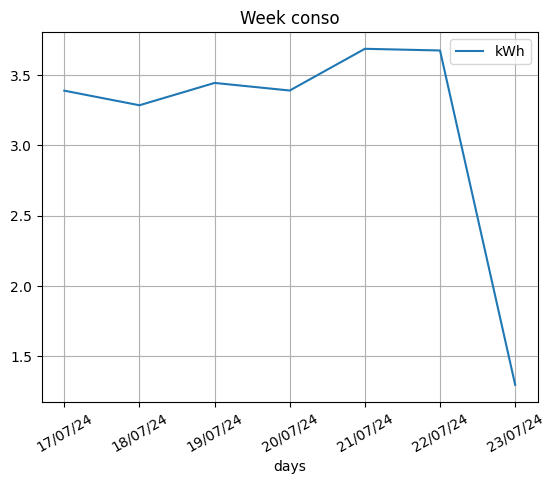

In [49]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [50]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [51]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


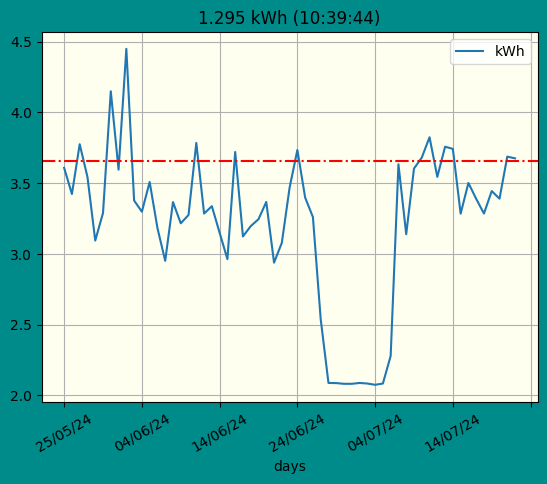

In [52]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [53]:
df_grp.mean()

kWh    3.65547
dtype: float64

In [54]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
10/07/24,3.680
11/07/24,3.824
12/07/24,3.544
13/07/24,3.757
14/07/24,3.742
15/07/24,3.284
16/07/24,3.501
17/07/24,3.389
18/07/24,3.285


In [55]:
df_grp

,kWh
days,
21/08/23,0.834
22/08/23,3.700
23/08/23,4.231
24/08/23,3.682
25/08/23,4.189
...,...
19/07/24,3.444
20/07/24,3.390
21/07/24,3.687


In [56]:
df_grp.tail(100).mean()

kWh    3.35457
dtype: float64

<Axes: xlabel='days'>

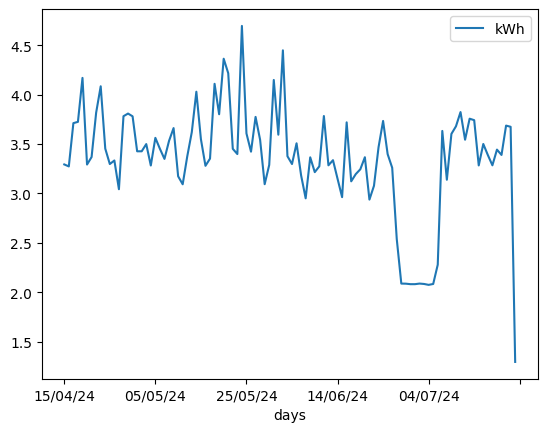

In [57]:
df_grp.tail(100).plot()

In [58]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.064167
std,0.682148
min,2.075000
25%,2.135750
50%,3.389500
75%,3.625500
max,3.824000


In [59]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/07/24 3.824
04/07/24 2.075


In [60]:
day

'23/07/24'

In [61]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1234254,27755,0.13,27.755,129.706359,29048064066,2024-07-23 00:00:08.944513,23/07/24,0:0:8
1234255,25838,0.14,25.838,139.329669,29048089904,2024-07-23 00:00:34.782513,23/07/24,0:0:34
1234256,25626,0.14,25.626,140.482323,29048115530,2024-07-23 00:01:00.408513,23/07/24,0:1:0
1234257,25887,0.14,25.887,139.065940,29048141417,2024-07-23 00:01:26.295513,23/07/24,0:1:26
1234258,26482,0.14,26.482,135.941394,29048167899,2024-07-23 00:01:52.777513,23/07/24,0:1:52
...,...,...,...,...,...,...,...,...
1235544,17570,0.20,17.570,204.894707,29086340596,2024-07-23 10:38:05.474513,23/07/24,10:38:5
1235545,17486,0.20,17.486,205.878989,29086358082,2024-07-23 10:38:22.960513,23/07/24,10:38:22
1235546,17368,0.21,17.368,207.277752,29086375450,2024-07-23 10:38:40.328513,23/07/24,10:38:40
1235547,17245,0.21,17.245,208.756161,29086392695,2024-07-23 10:38:57.573513,23/07/24,10:38:57


In [62]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1295 entries, 1234254 to 1235548
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1295 non-null   int64         
 1   kWh        1295 non-null   float64       
 2   sec        1295 non-null   float64       
 3   Wh         1295 non-null   float64       
 4   cumul(ms)  1295 non-null   int64         
 5   dates      1295 non-null   datetime64[ns]
 6   days       1295 non-null   object        
 7   heure      1295 non-null   object        
 8   hours      1295 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 101.2+ KB


In [63]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1234254    00  0.13
  1234255    00  0.14
  1234256    00  0.14
  1234257    00  0.14
  1234258    00  0.14
  ...       ...   ...
  1234376    00  0.10
  1234377    00  0.10
  1234378    00  0.10
  1234379    00  0.10
  1234380    00  0.10
  
  [127 rows x 2 columns]),
 ('01',
          hours   kWh
  1234381    01  0.10
  1234382    01  0.10
  1234383    01  0.10
  1234384    01  0.12
  1234385    01  0.20
  ...       ...   ...
  1234491    01  0.10
  1234492    01  0.10
  1234493    01  0.20
  1234494    01  0.18
  1234495    01  0.18
  
  [115 rows x 2 columns]),
 ('02',
          hours   kWh
  1234496    02  0.18
  1234497    02  0.18
  1234498    02  0.18
  1234499    02  0.18
  1234500    02  0.18
  ...       ...   ...
  1234607    02  0.18
  1234608    02  0.18
  1234609    02  0.18
  1234610    02  0.18
  1234611    02  0.17
  
  [116 rows x 2 columns]),
 ('03',
          hours   kWh
  1234612    03  0.17
  1234613    03  0.18
  1234614    03  0.1

In [64]:
groupedbyhour.count()

,kWh
hours,
00,127
01,115
02,116
03,118
04,116
05,119
06,116
07,114
08,111


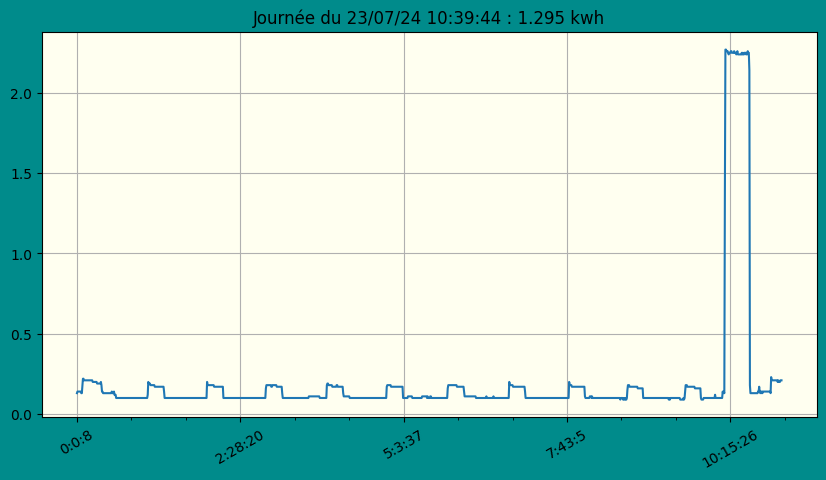

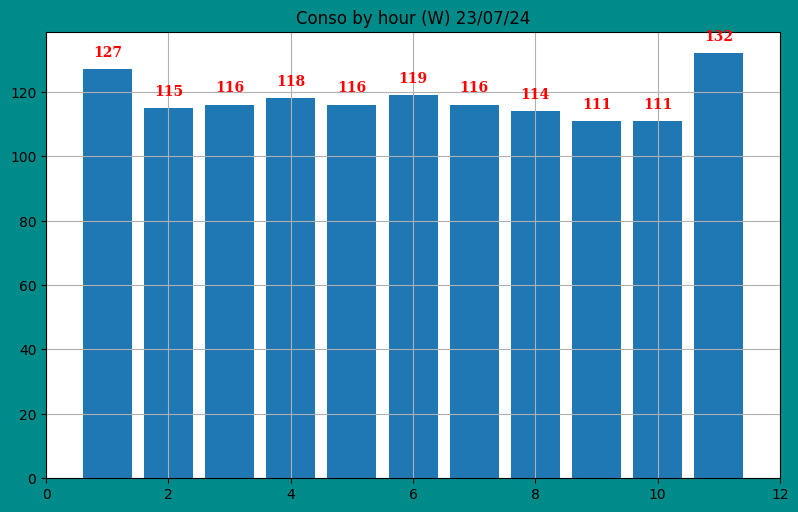

In [65]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [66]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [67]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [68]:
#conso_byhour(day)

In [69]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

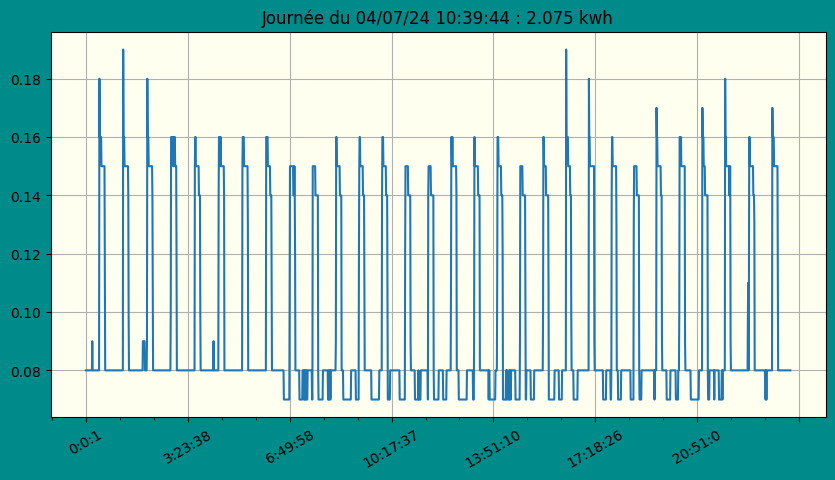

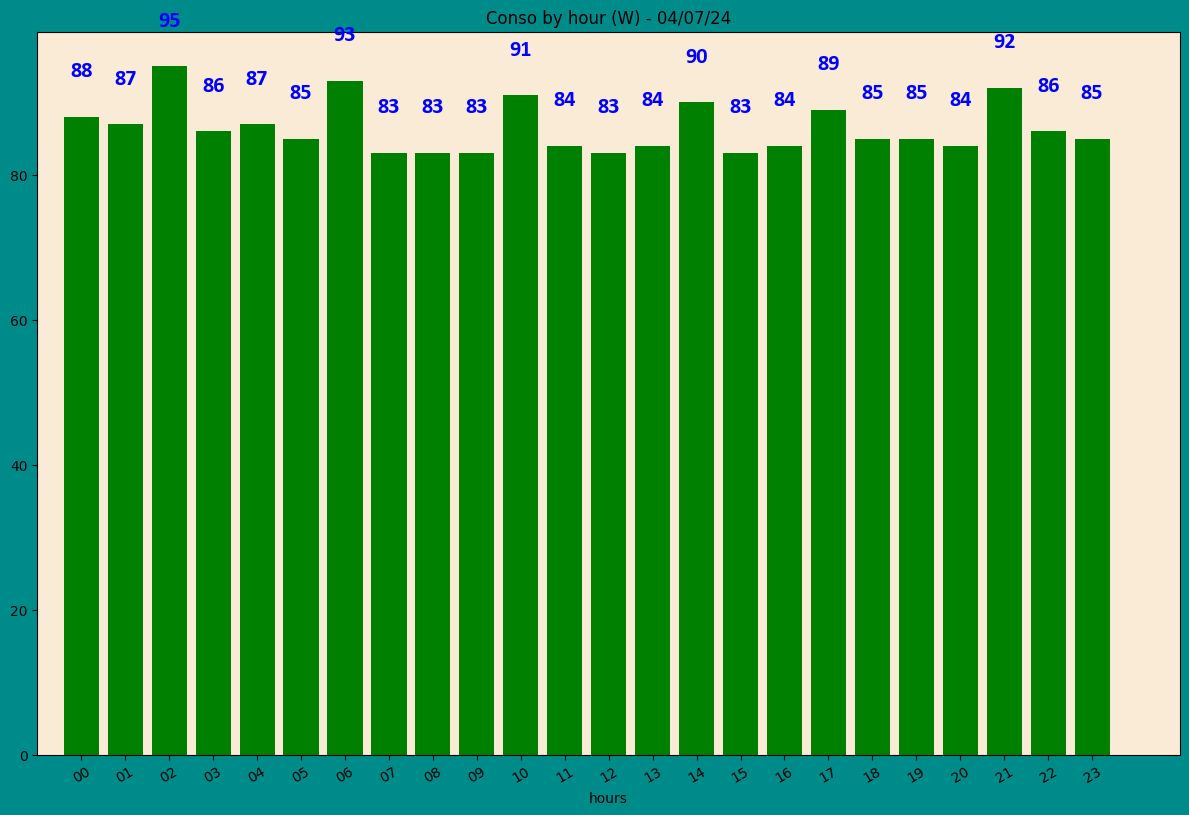

In [70]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [71]:
month

days
23/06/24    3.468
24/06/24    3.734
25/06/24    3.398
26/06/24    3.260
27/06/24    2.539
28/06/24    2.088
29/06/24    2.087
30/06/24    2.082
01/07/24    2.082
02/07/24    2.088
03/07/24    2.084
04/07/24    2.075
05/07/24    2.084
06/07/24    2.279
07/07/24    3.633
08/07/24    3.139
09/07/24    3.603
10/07/24    3.680
11/07/24    3.824
12/07/24    3.544
13/07/24    3.757
14/07/24    3.742
15/07/24    3.284
16/07/24    3.501
17/07/24    3.389
18/07/24    3.285
19/07/24    3.444
20/07/24    3.390
21/07/24    3.687
22/07/24    3.675
Name: kWh, dtype: float64

In [72]:
month.idxmax()

'11/07/24'

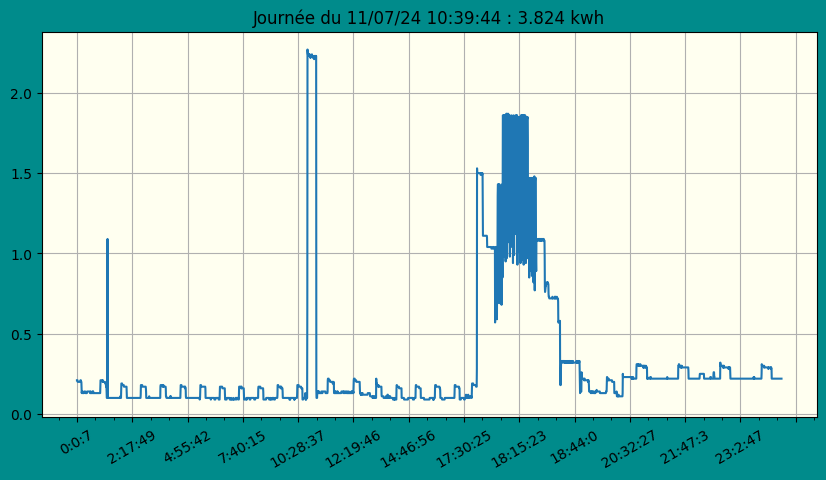

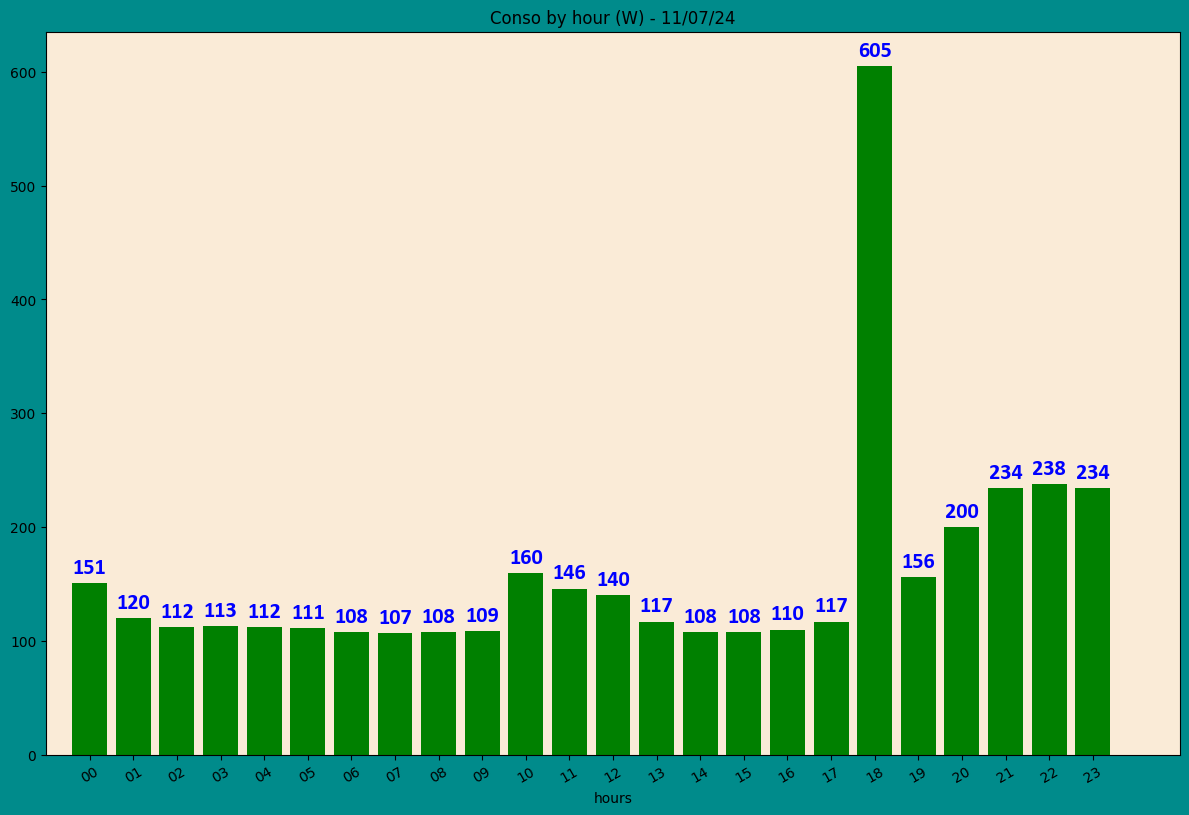

In [73]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [74]:
filename='conso_data.csv'
#conso_data.to_csv(filename)